In [2]:
#imports for plane fit
from Bio.PDB import *
import numpy as nphttp://localhost:8888/notebooks/CompleteMetrification.ipynb#
import math
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

In [3]:
#xyz cords for each phosphorous atom, normalize data
file = open('C:/Users/lords/Downloads/1x9n.pdb', 'r')
count = 0
xs = []
ys = []
zs = []
while True:


    line = file.readline()

    if not line:
        break
    a = line.split()
    b = 0



    if a[-1] == 'P':
        if a[0] == "ATOM":
            xs.append(float(a[-6]))
            ys.append(float(a[-5]))
            zs.append(float(a[-4]))

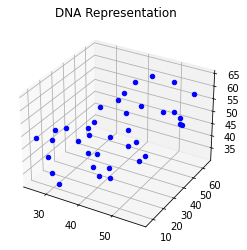

In [4]:
#DNA representation
fig = plt.figure()
ax = plt.axes(projection='3d')
for x in range(len(xs)):
    y = ys[x]
    y = float(y)
    z = zs[x]
    z = float(z)
    x = xs[x]
    x = float(x)
    ax.scatter(x, y, z, c = "blue")
ax.set_title("DNA Representation")
plt.show()

In [10]:
#plane fit
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
data = [xs, ys, zs]

def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100, 100), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = plt.subplot(111, projection="3d")

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = np.linspace(min(x_data), max(x_data), 20)
    yModel = np.linspace(min(y_data), max(y_data), 20)
    X, Y = np.meshgrid(xModel, yModel)

    Z = func(np.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label
    
    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100.0, 100.0), dpi=100)
    axes = f.add_subplot(111)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, 16, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

def func(data, a1, a2, b):

    # extract data from the single list
    x1 = data[0]
    x2 = data[1]

    return (a1/x1)+a2*x2+b

def equation(a1, a2, b):
    return(f"z = {a1}/x + {a2}/y + {b}")

if __name__ == "__main__":
    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xs, ys], zs, p0 = initialParameters)
    SurfacePlot(func, data, fittedParameters)

    #SurfacePlot(func, data,fittedParameters)
    print('fitted parameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters)

    absError = modelPredictions - zs
    print(modelPredictions)

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(zs))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)
    print('Equation', equation(fittedParameters[0], fittedParameters[1], fittedParameters[2]))

fitted parameters [-107.43664047    0.23560747   41.214057  ]
[39.67871793 40.38858173 41.05389374 42.00209337 43.02828983 44.12938279
 44.45514114 45.59784638 46.24477508 48.77756389 49.55384931 50.294375
 50.86434285 51.11272383 51.36448793 51.62587955 51.98161679 52.44259991
 54.19133449 52.99320933 51.76640081 50.6839222  49.45270124 48.51246595
 48.05398959 47.33370994 46.99968922 46.62246759 46.15763333 45.26807414
 44.23322563 43.53285288 42.78304128 42.1060869  41.23298236 40.49479752
 39.01225417]
RMSE: 7.686799183901045
R-squared: 0.23497399163898025
Equation z = -107.4366404665959/x + 0.23560747451957353/y + 41.21405699746654


In [6]:
#splitting phosphorous coordinates for each helix
print(xs)
hm = int(len(xs)/2)
x = xs[:hm]
print(x)
print(len(x))
y = ys[:hm]
print(y)
print(len(y))
z = zs[:hm]
print(z)
print(len(z))

x1 = xs[hm:]
print(x1)
print(len(x1))
y1 = ys[hm:]
print(y1)
print(len(y1))
z1 = zs[hm:]
print(z1)
print(len(z1))

[32.715 28.522 25.611 25.822 29.513 35.585 42.467 46.551 49.202 47.565
 43.243 39.697 37.849 37.008 40.183 45.429 51.749 57.386 49.399 52.856
 55.091 55.721 51.94  46.266 39.604 34.42  32.818 31.529 31.931 35.356
 38.856 43.698 44.476 41.885 36.778 30.191 25.295]
[32.715 28.522 25.611 25.822 29.513 35.585 42.467 46.551 49.202 47.565
 43.243 39.697 37.849 37.008 40.183 45.429 51.749 57.386]
18
[ 7.422 12.484 17.125 21.004 23.151 25.188 24.494 28.402 30.62  41.689
 45.942 50.027 53.007 54.335 54.43  54.229 54.513 55.604]
18
[33.294 34.051 37.454 43.291 48.513 50.025 49.487 45.935 40.075 37.116
 39.372 41.62  46.977 53.99  59.7   63.806 63.697 60.418]
18
[49.399 52.856 55.091 55.721 51.94  46.266 39.604 34.42  32.818 31.529
 31.931 35.356 38.856 43.698 44.476 41.885 36.778 30.191 25.295]
19
[64.311 58.622 53.065 48.377 43.747 40.833 40.545 39.222 38.451 37.418
 35.263 30.104 24.55  20.277 16.912 14.673 12.479 12.051  8.682]
19
[47.288 46.014 48.501 53.192 55.666 57.191 57.129 52.916 46.69

In [7]:
#determining the total distance covered by the connection between the knot points and the middle distance

distance_list = []
total_distance = 0

for x_coord in range(len(x)):
    x_temp = float(x[x_coord])
    y_temp = float(y[x_coord])
    z_temp = float(z[x_coord])
    
    if (x.[x_coord] + 1) != len(x):
        x_temp1 = float(x[x_coord + 1])
        y_temp1 = float(y[x_coord + 1])
        z_temp1 = float(z[x_coord + 1])

        distance = ((x_temp1 - x_temp)**2 + (y_temp1 - y_temp)**2 + (z_temp1 - z_temp)**2)**0.5
        distance_list.append(distance)

for distance in distance_list:
    total_distance += distance

half_length = total_distance/2
print(half_length)

distance_from_closest_point = half_length
point_1x = 0
point_1y = 0
point_1z = 0
point_2x = 0
point_2y = 0
point_2z = 0

for distance in distance_list:
    distance_from_closest_point -= distance
    if distance_from_closest_point < 0:
        distance_from_closest_point += distance
        point_1x = float(x[distance_list.index(distance)])
        point_1y = float(y[distance_list.index(distance)])
        point_1z = float(z[distance_list.index(distance)])
        point_2x = float(x[distance_list.index(distance) + 1])
        point_2y = float(y[distance_list.index(distance) + 1])
        point_2z = float(z[distance_list.index(distance) + 1])
        break
    else:
        continue

print(distance_from_closest_point)
print("(" + str(point_1x) + "," + str(point_1y) + "," + str(point_1z) + "), (" + str(point_2x) + "," + str(point_2y) + "," + str(point_2z) + ")")

distance_between_point = ((point_2x - point_1x)**2 + (point_2y - point_1y)**2 + (point_2z - point_1z)**2)**0.5
print(distance_between_point)

r = distance_from_closest_point/distance_between_point
print(r)

dx = point_2x-point_1x
rdx = abs(r * dx)
mid_x = rdx + point_1x

dy = point_2y-point_1y
rdy = abs(r * dy)
mid_y = rdy + point_1y

dz = point_2z-point_1z
rdz = abs(r * dz)
mid_z = rdz + point_1z
print("(" + str(mid_x) + "," + str(mid_y) + "," + str(mid_z) + ")")

AttributeError: 'numpy.ndarray' object has no attribute 'index'